<a href="https://colab.research.google.com/github/Shagun20/CSE508_Winter2023_A2_112/blob/main/IR_PartC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the MSLR dataset into a Pandas DataFrame.

import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/IR_AssnDatasets_Sem6/IR-assignment-2-data (2).txt'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(path, sep=' ', header=None)
data


,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239088,0,qid:29989,1:2,2:0,3:1,4:1,5:2,6:1,7:0,8:0.50000,...,128:9754,129:29,130:2889,131:63571,132:1,133:1,134:0,135:0,136:0,NaN
239089,0,qid:29989,1:2,2:0,3:1,4:0,5:2,6:1,7:0,8:0.50000,...,128:84,129:1,130:9450,131:19599,132:4,133:4,134:0,135:0,136:0,NaN
239090,1,qid:29989,1:2,2:0,3:2,4:2,5:2,6:1,7:0,8:1,...,128:1,129:0,130:144,131:6701,132:5,133:2,134:0,135:0,136:0,NaN
239091,1,qid:29989,1:2,2:0,3:2,4:0,5:2,6:1,7:0,8:1,...,128:0,129:11,130:2152,131:65535,132:37,133:16,134:0,135:0,136:0,NaN


In [ ]:
df=data

In [ ]:
df['qid'] = df['qid'].apply(lambda x: int(x.split(':')[1]))

In [ ]:
#remove last col
df = df.iloc[:, :-1]
df

,relevance,qid,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136
0,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:62,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0
99,1,4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,127:52,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667
100,2,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:28,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361
101,1,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688


In [ ]:
# Create a dictionary to store the relevance scores for each query-url pair.
#since each row represents a query-qid pair, we can directly store the relevance scores for each pair into a dict

#each key in dictionary represents a pair id of url and query
scores={}
for index, row in df.iterrows():
  scores[index]= row['relevance']



In [ ]:
# Calculate the DCG scores for each query-url pair, using the relevance scores and the DCG formula
import numpy as np
def dg(relevance, i):
    # Formula for calculating DCG
    a= relevance / np.log2(i+1)
    return a

# Sort the query-url pairs by their DCG scores, in descending order.
# Write the sorted query-url pairs to a new file, in order of the maximum DCG.

In [ ]:
#find dg for all the pairs, assuming we are provided the pairs in order of their ranking only

dcg=[]
sum=0
for i in range(len(df.index)):
  sum+=dg(scores[i],i+1)
  dcg.append(sum)





In [ ]:
dcg

[0.0,
 0.0,
 0.0,
 0.0,
 0.38685280723454163,
 0.38685280723454163,
 0.7201861405678749,
 1.666580770925061,
 1.666580770925061,
 1.666580770925061,
 1.945523716576191,
 1.945523716576191,
 1.945523716576191,
 2.2014817413860066,
 2.2014817413860066,
 2.2014817413860066,
 2.2014817413860066,
 2.436890654752645,
 2.899647081072163,
 3.354987578466069,
 3.5792314026836447,
 4.0213608615986525,
 4.457569445569716,
 4.457569445569716,
 4.670315499123079,
 5.0909353348373845,
 5.0909353348373845,
 5.0909353348373845,
 5.0909353348373845,
 5.292784421419484,
 5.292784421419484,
 5.292784421419484,
 5.489346053652307,
 5.489346053652307,
 5.8761988608868485,
 5.8761988608868485,
 6.257301685740395,
 6.635702404774135,
 6.823604229483243,
 6.823604229483243,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.1945022763139805,
 7.19450

In [ ]:
#append the found dcg value as column to the dataframe
df['dcg']=dcg

In [ ]:
df

,relevance,qid,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,dcg
0,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,0.000000
1,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,0.000000
2,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,0.000000
3,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,0.000000
4,1,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,0.386853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,11.737998
99,1,4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,11.888188
100,2,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,12.187929
101,1,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,12.337484


In [ ]:
#Now sorting the dataframe based on the column dcg, use sort_values function
sorted_by_dcg = df.sort_values(by='dcg', ascending=False)

In [ ]:
sorted_by_dcg 

,relevance,qid,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,dcg,ndcg
102,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,129:14,130:5334,131:6434,132:4,133:17,134:0,135:0,136:0,12.337484,1.000000
101,1,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,12.337484,1.000000
100,2,4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,12.187929,0.987878
99,1,4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,11.888188,0.963583
98,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,11.737998,0.951409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,0.386853,0.031356
2,0,4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,0.000000,0.000000
1,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,0.000000,0.000000
3,0,4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,0.000000,0.000000


In [ ]:
#number of ways this sorting can be done is the number of same permutations of the dcg array

from collections import defaultdict
from math import factorial

def find_perm(arr):
    freq = defaultdict(int)
    for elem in arr:
        freq[elem] += 1
    #freq stores the count of number of repeitions of each element in the array

    num = 1
    for value in freq.values():
        num *= value

    #n*r*c will be the answer if 3 elements are repeating respectively n, r and c number of times in array

    return num


In [ ]:
#number of ways files could be made 
print("Number of ways such files could be made : ", count(dcg))

Number of ways such files could be made :  880602513408


In [ ]:
dcg_entire_dataset= dcg[len(dcg)-1]

dcg_50=dcg[49]

In [ ]:
dcg_50

7.1945022763139805

In [ ]:
 #dcg_entire= 12.337484420604603
 #dcg_50= 7.1945022763139805



In [ ]:
#Calculate the ideal dcg for the dataset by sorting based on the relevance scores
sorted_by_rel = df.sort_values(by='relevance', ascending=False)

ideal_dcg=0
ideal_dcg_50=0
cnt=0

for index, row in sorted_by_rel.iterrows():
   ideal_dcg+=dg(row['relevance'],cnt+1)
   cnt+=1
  



0   1
3.0   2
4.2618595071429155   3
5.2618595071429155   4
6.123212623289701   5
6.8969182377587845   6
7.609332611974829   7
8.275999278641496   8
8.906929032212954   9
9.508989023540916   10
10.087118676176692   11
10.645004567478951   12
11.18548087633359   13
11.710779946407978   14
12.222695996027609   15
12.722695996027609   16
13.21199708026406   17
13.691622013400323   18
14.1624398401336   19
14.393818053293359   20
14.621488301990311   21
14.845732126207887   22
15.066796855665391   23
15.284901147650922   24
15.50023942668762   25
15.712985480240983   26
15.923295398098135   27
16.131309995774643   28
16.337156828235077   29
16.540951875325582   30
16.742800961907683   31
16.942800961907682   32
17.141040825078242   33
17.337602457311064   34
17.53256147920485   35
17.72598788282212   36
17.917946602828682   37
18.108498015255456   38
18.297698374772327   39
18.485600199481436   40
18.672252610720378   41
18.857701634135747   42
19.041990467284453   43
19.225159718198086   

In [ ]:
ideal_dcg

19.407247618668023

In [ ]:
#Perform the same steps but for ndcg at pos 50
df_50= df.head(50)

#Calculate the ideal dcg for the top 50 rows in dataset by sorting based on the relevance scores
sorted_by_rel_50 = df_50.sort_values(by='relevance', ascending=False)

ideal_dcg_50=0
cnt=0

for index, row in sorted_by_rel_50.iterrows():
   ideal_dcg_50+=dg(row['relevance'],cnt+1)
   cnt+=1



In [ ]:
ideal_dcg_50

12.58382772001186

In [ ]:
print("NDCG for entire dataset is ", dcg_entire_dataset/ideal_dcg)
print("NDCG at pos 50 is ", dcg_50/ideal_dcg_50)


NDCG for entire dataset is  0.6357153091990775
NDCG at pos 50 is  0.5717260627203818


In [ ]:
# For the third objective, assume a model that ranks URLs based on the value of feature 75,
# which represents the sum of TF-IDF on the whole document.

#URLs with higher feature 75 values are considered more relevant.


In [ ]:
df['feature_75'] = df['feature_75'].apply(lambda x: float(x.split(':')[1]))

In [ ]:
df_sorted_by_75 = df.sort_values(by='feature_75', ascending=False)

In [ ]:
#now the new dataframe ranks urls based on their feature 75 values
df_sorted_by_75['feature_75']

8      972.826451
67     612.893205
56     571.500533
1      538.388954
101    528.520116
          ...    
94      15.773388
16      14.972391
86      14.972391
49       3.539923
81       3.539923
Name: feature_75, Length: 103, dtype: float64

In [ ]:
precision_at_k=[]
recall_at_k=[]

no_of_rel=0
total=0
#finding precision at k 

for index, row in df_sorted_by_75.iterrows():
  total+=1

  if row['relevance']!=0:
    no_of_rel+=1

  precision_at_k.append(no_of_rel/total)

  

  



In [ ]:
precision_at_k

[0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.16666666666666666,
 0.2857142857142857,
 0.375,
 0.3333333333333333,
 0.4,
 0.36363636363636365,
 0.4166666666666667,
 0.46153846153846156,
 0.5,
 0.5333333333333333,
 0.5625,
 0.5294117647058824,
 0.5555555555555556,
 0.5263157894736842,
 0.55,
 0.5238095238095238,
 0.5,
 0.5217391304347826,
 0.5416666666666666,
 0.56,
 0.5769230769230769,
 0.5555555555555556,
 0.5357142857142857,
 0.5172413793103449,
 0.5,
 0.4838709677419355,
 0.5,
 0.48484848484848486,
 0.5,
 0.4857142857142857,
 0.4722222222222222,
 0.4864864864864865,
 0.5,
 0.48717948717948717,
 0.5,
 0.5121951219512195,
 0.5238095238095238,
 0.5116279069767442,
 0.5,
 0.4888888888888889,
 0.4782608695652174,
 0.48936170212765956,
 0.4791666666666667,
 0.46938775510204084,
 0.48,
 0.49019607843137253,
 0.5,
 0.49056603773584906,
 0.5,
 0.509090909090909,
 0.5,
 0.5087719298245614,
 0.5172413793103449,
 0.5084745762711864,
 0.5166666666666667,
 0.5081967213114754,
 0.5,
 0.5079365079365079,
 0.5,


In [ ]:
total_rel= no_of_rel
total_rel

44

In [ ]:
#for recal, we see how many of the total rel are retrieved by now
found=0
for index, row in df_sorted_by_75.iterrows():

  if row['relevance']!=0:
    found+=1

  recall_at_k.append(found/total_rel)



In [ ]:
recall_at_k

[0.0,
 0.0,
 0.0,
 0.0,
 0.022727272727272728,
 0.022727272727272728,
 0.045454545454545456,
 0.06818181818181818,
 0.06818181818181818,
 0.09090909090909091,
 0.09090909090909091,
 0.11363636363636363,
 0.13636363636363635,
 0.1590909090909091,
 0.18181818181818182,
 0.20454545454545456,
 0.20454545454545456,
 0.22727272727272727,
 0.22727272727272727,
 0.25,
 0.25,
 0.25,
 0.2727272727272727,
 0.29545454545454547,
 0.3181818181818182,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.36363636363636365,
 0.36363636363636365,
 0.38636363636363635,
 0.38636363636363635,
 0.38636363636363635,
 0.4090909090909091,
 0.4318181818181818,
 0.4318181818181818,
 0.45454545454545453,
 0.4772727272727273,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5227272727272727,
 0.5227272727272727,
 0.5227272727272727,
 0.5454545454545454,
 0.5681818181818182,
 0.5909090909090909,
 0.5909090909090909,
 0.6136363636363636,
 0.6363636363636364

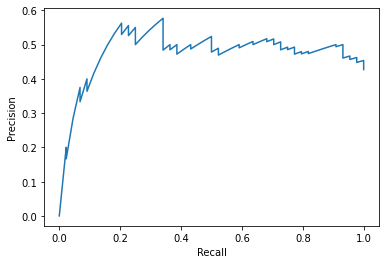

In [ ]:
#plot between precision and recall,
#precision on y axis, recall at x

import matplotlib.pyplot as plt

plt.plot(recall_at_k, precision_at_k)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

